In [20]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

mnist = fetch_openml('mnist_784')
inputData, y = mnist["data"], mnist["target"]

In [21]:
print(inputData.shape)
print(y.shape)

(70000, 784)
(70000,)


In [22]:
inputData = inputData / 255
nDigits = 10

In [23]:
yOneHot= np.zeros([y.shape[0], nDigits])
for i in range(y.shape[0]):
    yOneHot[i, int(y[i])]

y = yOneHot

In [25]:
print(y.shape)

(70000, 10)


In [28]:
m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m, :].reshape(m, nDigits), y[m:, :].reshape(m_test, nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]
np.random.seed(1002)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


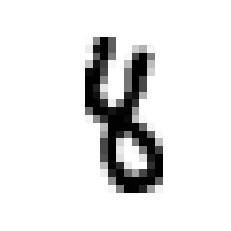

In [29]:
i = 7000
plt.imshow(InputData_train[i, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis("off")
print(y_train[i, :])

In [30]:
# Define Activation, loss, and their derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

In [31]:
def sigmoid_derivative(z):
    return z * (1 - z)

In [32]:
def reLu(x):
    return np.maximum(0, x)

In [33]:
def reLu_derivative(x):
    return 0.5 * (np.sign(x) + 1) # ReLu derivative is either 0 or 1

In [43]:
def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = - (1 / m) * L_sum
    return L

In [45]:
def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis = 0)

In [46]:
def CE_softmax_derivative(output, ideal_output):
    return output - ideal_output